In [ ]:
#%pip install seaborn
#%pip install matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 32.1 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 59.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use upd

In [2]:
import pandas as pd
import numpy as np
import time
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import os
# print(sys.getrecursionlimit())
#original 3000
sys.setrecursionlimit(150000)

In [ ]:
array_pat_id = []

# Create a list of patient IDs in the format "PAT000001", "PAT000002", ..., "PAT010000"
for i in range(1, 10001):
    array_pat_id.append("PAT" + str(i).zfill(6))


file_name = "tempos_execucao.csv"

if not os.path.exists(file_name):
    with open(file_name, "w") as file:
        file.write("operacao;algoritmo;tempo_execucao\n")

sns.set_theme(rc={'figure.figsize':(8,7)})

In [4]:
class TreeNode:
    def __init__(self, key, data):
        self.key = key
        self.data = data
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key, data):
        if self.root is None:
            self.root = TreeNode(key, data)
        else:
            self._insert(self.root, key, data)

    def _insert(self, node, key, data):
        if key < node.key:
            if node.left is None:
                node.left = TreeNode(key, data)
            else:
                self._insert(node.left, key, data)
        elif key > node.key:
            if node.right is None:
                node.right = TreeNode(key, data)
            else:
                self._insert(node.right, key, data)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def height(self):
        return self._height(self.root)

    def _height(self, node):
        if node is None:
            return 0
        left_height = self._height(node.left)
        right_height = self._height(node.right)
        return max(left_height, right_height) + 1



class AVLNode(TreeNode):
    def __init__(self, key, data):
        super().__init__(key, data)
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    def insert(self, key, data):
        self.root = self._insert(self.root, key, data)

    def _insert(self, node, key, data):
        if node is None:
            return AVLNode(key, data)
        if key < node.key:
            node.left = self._insert(node.left, key, data)
        elif key > node.key:
            node.right = self._insert(node.right, key, data)
        else:
            return node

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        balance = self._get_balance(node)

        if balance > 1 and key < node.left.key:
            return self._rotate_right(node)
        if balance < -1 and key > node.right.key:
            return self._rotate_left(node)
        if balance > 1 and key > node.left.key:
            node.left = self._rotate_left(node.left)
            return self._rotate_right(node)
        if balance < -1 and key < node.right.key:
            node.right = self._rotate_right(node.right)
            return self._rotate_left(node)

        return node

    def _rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self._get_height(z.left), self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))
        return y

    def _rotate_right(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self._get_height(z.left), self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))
        return y

    def _get_height(self, node):
        if not node:
            return 0
        return node.height

    def _get_balance(self, node):
        if not node:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def get_height(self):
        return self._get_height(self.root)



In [5]:
# https://www.kaggle.com/datasets/ak0212/uae-cancer-patient-dataset?resource=download

df = pd.read_csv("_cancer_dataset_uae.csv", dtype=str)


columns_to_delete = ['Death_Date', 'Cause_of_Death', 'Comorbidities', 'Primary_Physician', 'Emirate', 'Nationality']
df = df.drop(columns=columns_to_delete)

df["Age"] = df["Age"].astype(int)
df["Weight"] = df["Weight"].astype(int)
df["Height"] = df["Height"].astype(int)
df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2) #IMC
df["BMI"] = df["BMI"].round(2)  
df["BMI"] = df["BMI"].astype(float)
df["Diagnosis_Date"] = pd.to_datetime(df["Diagnosis_Date"], format="%Y-%m-%d", errors='coerce')
df["Treatment_Start_Date"] = pd.to_datetime(df["Treatment_Start_Date"], format="%Y-%m-%d", errors='coerce')

df.head(10)



,Patient_ID,Age,Gender,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Outcome,Smoking_Status,Ethnicity,Weight,Height,BMI
0,PAT000001,69,Female,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Recovered,Non-Smoker,European,61,157,24.75
1,PAT000002,32,Male,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Recovered,Smoker,South Asian,80,175,26.12
2,PAT000003,89,Male,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Under Treatment,Non-Smoker,South Asian,50,175,16.33
3,PAT000004,78,Female,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Recovered,Former Smoker,African,44,155,18.31
4,PAT000005,38,Female,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Recovered,Former Smoker,East Asian,101,160,39.45
5,PAT000006,41,Female,2015-02-10,Breast,I,Surgery,2015-04-21,Dubai Hospital,Recovered,Smoker,European,59,176,19.05
6,PAT000007,20,Male,2023-02-27,Ovarian,IV,Chemotherapy,2023-05-15,Sheikh Khalifa Hospital,Recovered,Non-Smoker,Arab,66,155,27.47
7,PAT000008,39,Male,2018-04-05,Breast,I,Surgery,2018-08-10,Sheikh Khalifa Hospital,Under Treatment,Non-Smoker,South Asian,27,189,7.56
8,PAT000009,70,Female,2022-12-12,Lung,III,Immunotherapy,2023-05-29,Dubai Hospital,Deceased,Non-Smoker,South Asian,60,162,22.86
9,PAT000010,19,Female,2018-05-29,Breast,I,Surgery,2018-07-25,Cleveland Clinic Abu Dhabi,Recovered,Non-Smoker,East Asian,73,180,22.53


In [6]:
df.dtypes

Patient_ID                      object
Age                              int64
Gender                          object
Diagnosis_Date          datetime64[ns]
Cancer_Type                     object
Cancer_Stage                    object
Treatment_Type                  object
Treatment_Start_Date    datetime64[ns]
Hospital                        object
Outcome                         object
Smoking_Status                  object
Ethnicity                       object
Weight                           int64
Height                           int64
BMI                            float64
dtype: object

In [7]:
# Create a binary search tree and insert rows from the DataFrame

for i in range(1, 11):
    # Start the timer
    start_time = time.time()

    bst = BinarySearchTree()

    # The underscore (_) is used as a throwaway variable to indicate that the index from df.iterrows() is not needed.
    for _, row in df.iterrows():
        #bst.insert(row["Patient_ID"], row.to_dict())
        bst.insert(row["Patient_ID"], row.to_dict())

    # Stop the timer
    end_time = time.time()

    # Calculate the total time taken
    time_taken = end_time - start_time
    time_taken = round(time_taken,6)

    with open("tempos_execucao.csv", "a") as file:
        file.write("INSERCAO;ARVORE_BUSCA_BINARIA;"+str(time_taken))
        file.write("\n")
    
    print(f"Time taken to insert all items in the binary search tree: {time_taken:.6f} seconds for iteration {i}")

height = bst.height()
print(height)  # Get the height of the tree


Time taken to insert all items in the binary search tree: 6.314729 seconds for iteration 1
Time taken to insert all items in the binary search tree: 6.701953 seconds for iteration 2
Time taken to insert all items in the binary search tree: 6.223446 seconds for iteration 3
Time taken to insert all items in the binary search tree: 6.181967 seconds for iteration 4
Time taken to insert all items in the binary search tree: 6.209896 seconds for iteration 5
Time taken to insert all items in the binary search tree: 6.255920 seconds for iteration 6
Time taken to insert all items in the binary search tree: 6.200273 seconds for iteration 7
Time taken to insert all items in the binary search tree: 6.159279 seconds for iteration 8
Time taken to insert all items in the binary search tree: 6.242919 seconds for iteration 9
Time taken to insert all items in the binary search tree: 6.222959 seconds for iteration 10
10000


In [8]:
for i in range(1, 11):
    # Start the timer
    start_time = time.time()

    avl = AVLTree()

    for _, row in df.iterrows():
        avl.insert(row["Patient_ID"], row.to_dict())

    # Stop the timer
    end_time = time.time()

    # Calculate the total time taken
    time_taken = end_time - start_time
    time_taken = round(time_taken,6)

    with open("tempos_execucao.csv", "a") as file:
        file.write("INSERCAO;AVL;"+str(time_taken))
        file.write("\n")
    
    print(f"Time taken to insert all items in the AVL tree: {time_taken:.6f} seconds for iteration {i}")


height = avl.get_height()
print(height)  # Get the height of the tree


Time taken to insert all items in the AVL tree: 0.435737 seconds for iteration 1
Time taken to insert all items in the AVL tree: 0.344320 seconds for iteration 2
Time taken to insert all items in the AVL tree: 0.327804 seconds for iteration 3
Time taken to insert all items in the AVL tree: 0.336887 seconds for iteration 4
Time taken to insert all items in the AVL tree: 0.347918 seconds for iteration 5
Time taken to insert all items in the AVL tree: 0.329879 seconds for iteration 6
Time taken to insert all items in the AVL tree: 0.336250 seconds for iteration 7
Time taken to insert all items in the AVL tree: 0.338513 seconds for iteration 8
Time taken to insert all items in the AVL tree: 0.350102 seconds for iteration 9
Time taken to insert all items in the AVL tree: 0.328250 seconds for iteration 10
14


In [9]:
#results = bst.search(30)  # Example search for age 30
#type(results)

for i in range(1, 11):
    # Start the timer
    start_time = time.time()

    # Iterate over the array and search for each ID in the binary search tree
    for p_id in array_pat_id:
        results = bst.search(p_id)
        #if results is not None:
        #    print(results.data)

    # Stop the timer
    end_time = time.time()

    # Calculate the total time taken
    time_taken = end_time - start_time
    time_taken = round(time_taken,6)

    with open("tempos_execucao.csv", "a") as file:
        file.write("BUSCA;ARVORE_BUSCA_BINARIA;"+str(time_taken))
        file.write("\n")
    
    print(f"Time taken to search all items in the binary search tree: {time_taken:.6f} seconds for iteration {i}")





Time taken to search all items in the binary search tree: 5.024493 seconds for iteration 1
Time taken to search all items in the binary search tree: 5.007762 seconds for iteration 2
Time taken to search all items in the binary search tree: 5.055348 seconds for iteration 3
Time taken to search all items in the binary search tree: 4.977185 seconds for iteration 4
Time taken to search all items in the binary search tree: 5.053655 seconds for iteration 5
Time taken to search all items in the binary search tree: 4.998229 seconds for iteration 6
Time taken to search all items in the binary search tree: 5.024899 seconds for iteration 7
Time taken to search all items in the binary search tree: 4.974677 seconds for iteration 8
Time taken to search all items in the binary search tree: 4.938677 seconds for iteration 9
Time taken to search all items in the binary search tree: 4.933709 seconds for iteration 10


In [10]:
for i in range(1, 11):
    # Start the timer
    start_time = time.time()

    # Iterate over the array and search for each ID in the AVL tree
    for p_id in array_pat_id:
        results = avl.search(p_id)

    # Stop the timer
    end_time = time.time()

    # Calculate the total time taken
    time_taken = end_time - start_time

    with open("tempos_execucao.csv", "a") as file:
        file.write("BUSCA;AVL;"+str(time_taken))
        file.write("\n")
    
    print(f"Time taken to search all items in the AVL tree: {time_taken:.6f} seconds for iteration {i}")



Time taken to search all items in the AVL tree: 0.006912 seconds for iteration 1
Time taken to search all items in the AVL tree: 0.007061 seconds for iteration 2
Time taken to search all items in the AVL tree: 0.006913 seconds for iteration 3
Time taken to search all items in the AVL tree: 0.006734 seconds for iteration 4
Time taken to search all items in the AVL tree: 0.006751 seconds for iteration 5
Time taken to search all items in the AVL tree: 0.007138 seconds for iteration 6
Time taken to search all items in the AVL tree: 0.006658 seconds for iteration 7
Time taken to search all items in the AVL tree: 0.006761 seconds for iteration 8
Time taken to search all items in the AVL tree: 0.006843 seconds for iteration 9
Time taken to search all items in the AVL tree: 0.006609 seconds for iteration 10


In [ ]:
medicoes_data = pd.read_csv("tempos_execucao.csv", sep=";", dtype=str)
medicoes_data["tempo_execucao"] = medicoes_data["tempo_execucao"].astype(float)

#medicoes_data["tempo_execucao"] = pd.to_numeric(medicoes_data["tempo_execucao"], errors='coerce')

medicoes_data.head()


,operacao,algoritmo,tempo_execucao
0,INSERCAO,ARVORE_BUSCA_BINARIA,6.372288
1,INSERCAO,ARVORE_BUSCA_BINARIA,6.427014
2,INSERCAO,ARVORE_BUSCA_BINARIA,6.277083
3,INSERCAO,ARVORE_BUSCA_BINARIA,6.256221
4,INSERCAO,ARVORE_BUSCA_BINARIA,6.290096


In [14]:
medicoes_data.dtypes

operacao           object
algoritmo          object
tempo_execucao    float64
dtype: object

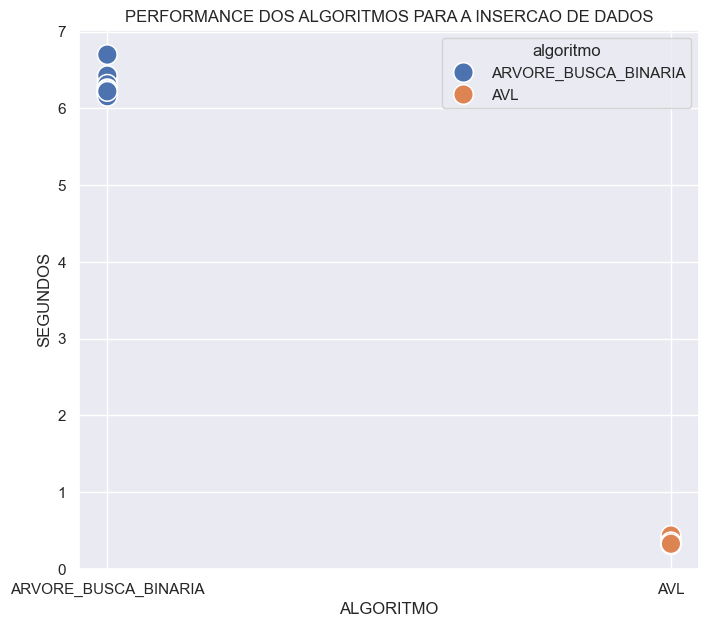

In [ ]:
medicoes_insercao = medicoes_data[medicoes_data["operacao"] == "INSERCAO"]

sns.scatterplot(x="algoritmo", y="tempo_execucao", s=200, hue="algoritmo", data=medicoes_insercao)

plt.xlabel("ALGORITMO", loc='center')
plt.xticks(ha='center')
#plt.subplots_adjust(left=0.7)  # Adjust the left margin to shift the plot elements to the right
plt.ylabel("SEGUNDOS")
plt.title("PERFORMANCE DOS ALGORITMOS PARA A INSERCAO DE DADOS")

plt.show()



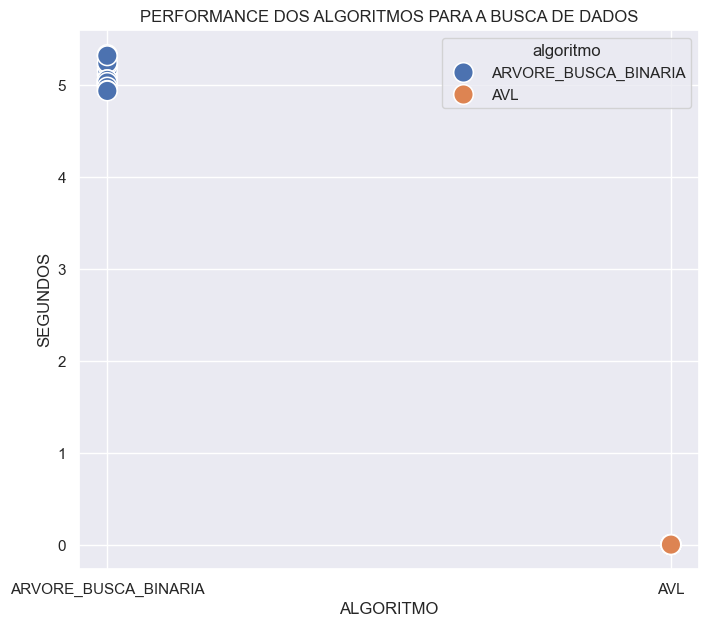

In [41]:
medicoes_busca = medicoes_data[medicoes_data["operacao"] == "BUSCA"]

sns.scatterplot(x="algoritmo", y="tempo_execucao", s=200, hue="algoritmo", data=medicoes_busca)

plt.xlabel("ALGORITMO", loc='center')
plt.xticks(ha='center')
plt.ylabel("SEGUNDOS")
plt.title("PERFORMANCE DOS ALGORITMOS PARA A BUSCA DE DADOS")

plt.show()


In [ ]:
medicoes_busca[medicoes_busca["algoritmo"] == "ARVORE_BUSCA_BINARIA"].head(100)


,operacao,algoritmo,tempo_execucao
20,BUSCA,ARVORE_BUSCA_BINARIA,5.006362
21,BUSCA,ARVORE_BUSCA_BINARIA,5.022250
22,BUSCA,ARVORE_BUSCA_BINARIA,5.328004
23,BUSCA,ARVORE_BUSCA_BINARIA,5.112613
24,BUSCA,ARVORE_BUSCA_BINARIA,5.158997
25,BUSCA,ARVORE_BUSCA_BINARIA,5.214149
26,BUSCA,ARVORE_BUSCA_BINARIA,5.313096
27,BUSCA,ARVORE_BUSCA_BINARIA,5.049662
28,BUSCA,ARVORE_BUSCA_BINARIA,5.238251
29,BUSCA,ARVORE_BUSCA_BINARIA,5.315794


In [48]:
medicoes_busca[medicoes_busca["algoritmo"] == "ARVORE_BUSCA_BINARIA"]["tempo_execucao"].describe()  # Descriptive statistics for the search times in the binary search tree

count    20.000000
mean      5.087391
std       0.128294
min       4.933709
25%       5.004329
50%       5.037280
75%       5.172785
max       5.328004
Name: tempo_execucao, dtype: float64

In [45]:
medicoes_busca[medicoes_busca["algoritmo"] == "AVL"].head(100)


,operacao,algoritmo,tempo_execucao
30,BUSCA,AVL,0.008885
31,BUSCA,AVL,0.008957
32,BUSCA,AVL,0.007240
33,BUSCA,AVL,0.007512
34,BUSCA,AVL,0.006867
35,BUSCA,AVL,0.006881
36,BUSCA,AVL,0.006913
37,BUSCA,AVL,0.006844
38,BUSCA,AVL,0.006734
39,BUSCA,AVL,0.006700


In [49]:
medicoes_busca[medicoes_busca["algoritmo"] == "AVL"]["tempo_execucao"].describe()  # Descriptive statistics for the search times in the binary search tree


count    20.000000
mean      0.007096
std       0.000660
min       0.006609
25%       0.006746
50%       0.006874
75%       0.007081
max       0.008957
Name: tempo_execucao, dtype: float64

In [46]:
medicoes_insercao[medicoes_insercao["algoritmo"] == "AVL"].head(100)

,operacao,algoritmo,tempo_execucao
10,INSERCAO,AVL,0.350988
11,INSERCAO,AVL,0.328570
12,INSERCAO,AVL,0.399359
13,INSERCAO,AVL,0.320390
14,INSERCAO,AVL,0.317458
15,INSERCAO,AVL,0.316856
16,INSERCAO,AVL,0.335235
17,INSERCAO,AVL,0.317986
18,INSERCAO,AVL,0.317744
19,INSERCAO,AVL,0.319199


In [50]:
medicoes_insercao[medicoes_insercao["algoritmo"] == "AVL"]["tempo_execucao"].describe()  # Descriptive statistics for the search times in the binary search tree

count    20.000000
mean      0.339972
std       0.029382
min       0.316856
25%       0.320092
50%       0.332557
75%       0.345220
max       0.435737
Name: tempo_execucao, dtype: float64

In [47]:
medicoes_insercao[medicoes_insercao["algoritmo"] == "ARVORE_BUSCA_BINARIA"].head(100)

,operacao,algoritmo,tempo_execucao
0,INSERCAO,ARVORE_BUSCA_BINARIA,6.372288
1,INSERCAO,ARVORE_BUSCA_BINARIA,6.427014
2,INSERCAO,ARVORE_BUSCA_BINARIA,6.277083
3,INSERCAO,ARVORE_BUSCA_BINARIA,6.256221
4,INSERCAO,ARVORE_BUSCA_BINARIA,6.290096
5,INSERCAO,ARVORE_BUSCA_BINARIA,6.197653
6,INSERCAO,ARVORE_BUSCA_BINARIA,6.208546
7,INSERCAO,ARVORE_BUSCA_BINARIA,6.218819
8,INSERCAO,ARVORE_BUSCA_BINARIA,6.191337
9,INSERCAO,ARVORE_BUSCA_BINARIA,6.277498


In [51]:
medicoes_insercao[medicoes_insercao["algoritmo"] == "AVL"]["tempo_execucao"].describe()  # Descriptive statistics for the search times in the binary search tree

count    20.000000
mean      0.339972
std       0.029382
min       0.316856
25%       0.320092
50%       0.332557
75%       0.345220
max       0.435737
Name: tempo_execucao, dtype: float64